In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
%matplotlib inline

In [2]:
haberman=pd.read_csv("haberman.csv")
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Changing the name of each columns so that we will objectify the proper result

In [3]:
haberman.columns=["Age","Operation_year","Axiliary_node","Survival_status"]
haberman.head()

,Age,Operation_year,Axiliary_node,Survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
haberman["Survival_status"]=haberman["Survival_status"].map({1:"Yes",2:"No"})
haberman.head()

,Age,Operation_year,Axiliary_node,Survival_status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


In [23]:
haberman.tail()

,Age,Operation_year,Axiliary_node,Survival_status
300,75,62,1,Yes
301,76,67,0,Yes
302,77,65,3,Yes
303,78,65,1,No
304,83,58,2,No


In [25]:
haberman.columns

Index(['Age', 'Operation_year', 'Axiliary_node', 'Survival_status'], dtype='object')

In [27]:
haberman.shape

(305, 4)

In [28]:
haberman["Survival_status"].describe()

count     305
unique      2
top       Yes
freq      224
Name: Survival_status, dtype: object

In [29]:
haberman["Survival_status"].value_counts()

Yes    224
No      81
Name: Survival_status, dtype: int64

Bivariate exploratory data analysis

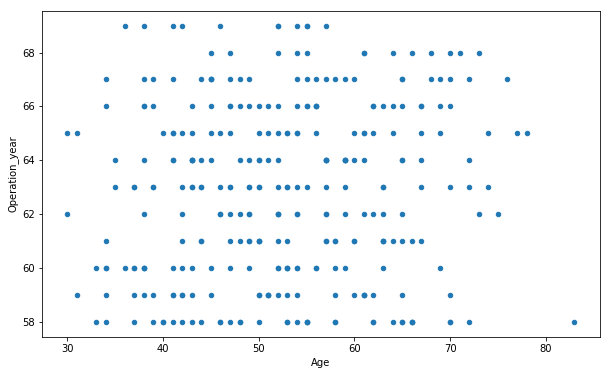

In [39]:
haberman.plot(x="Age",y="Operation_year",kind="scatter",figsize=(10,6))
plt.show()

it's not easy to determine the survival status using 2d scatter plot because we are not able to determine how many people died or survived after some operation year so for tha we will use 2d scatter plot using seaborn

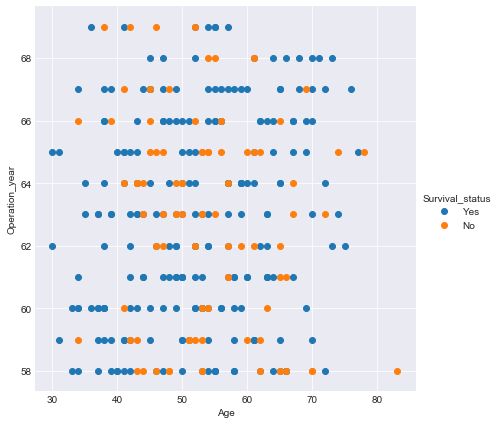

In [58]:
sns.set_style("darkgrid")
sns.FacetGrid(haberman,hue="Survival_status",size=6).map(plt.scatter,"Age","Operation_year").add_legend()
plt.show()

The person whose age are between 30-40 has greater survival rate as compared to others,at the operation yearof 1960 and worst survival rate is in age 40-60 but we are not getting the survival rate yearwise with respect o age

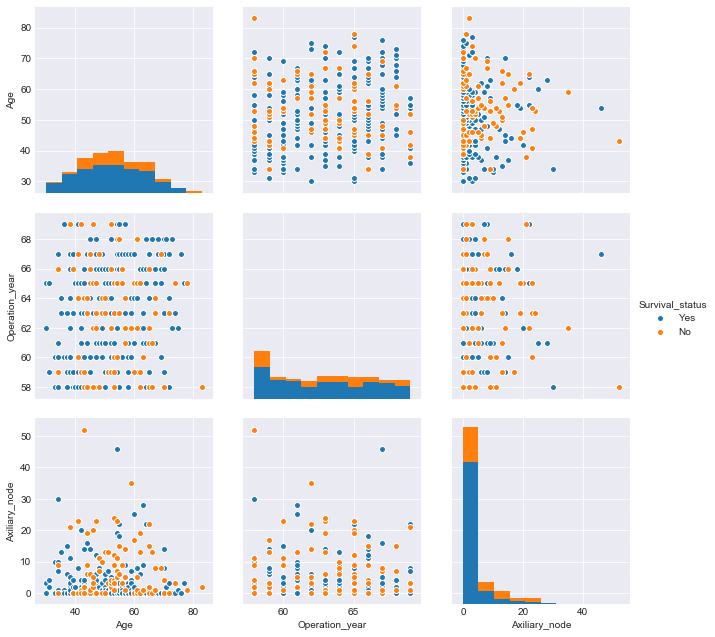

In [47]:
sns.set_style("darkgrid")
sns.pairplot(haberman,hue="Survival_status",size=3)
plt.show()

it's not easy to determine survival rate using pair plot 

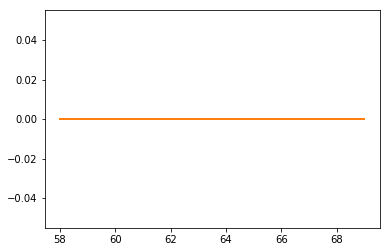

In [5]:
haberman_yes=haberman.loc[haberman["Survival_status"]=="Yes"]
haberman_no=haberman.loc[haberman["Survival_status"]=="No"]
plt.plot(haberman_yes["Operation_year"],np.zeros_like(haberman_yes["Operation_year"]))
plt.plot(haberman_no["Operation_year"],np.zeros_like(haberman_no["Operation_year"]))
plt.show()

                      
 

1d plot cannot determine the ststus and proper reuslt of data

By using  histogram and pdf we can get the status o survival using single variable plot

C:\Users\KSPA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\KSPA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


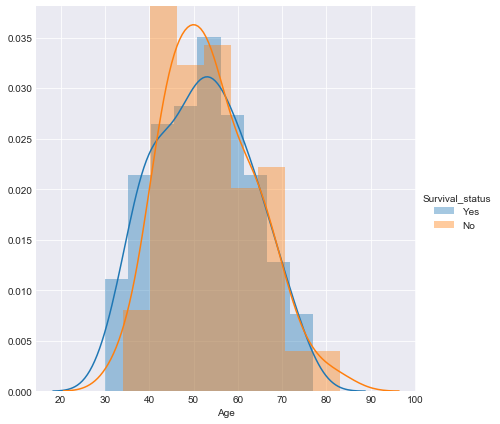

In [53]:
sns.set_style("darkgrid")
sns.FacetGrid(haberman,hue="Survival_status",size=6).map(sns.distplot,"Age").add_legend()
plt.show()

During the age from 30-40 the survival rate is very higher ,at the age between 40-60 the survival rate is very low but the ge between 60-70  the survival ate is balanced pproximately equal number of people survived and dead and the higher than 70 years old no people were survived

C:\Users\KSPA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\KSPA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


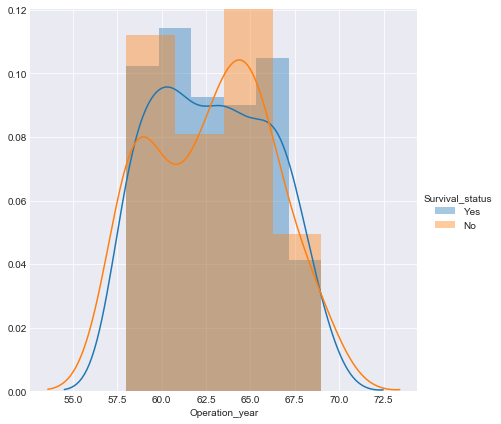

In [57]:
sns.set_style("darkgrid")
sns.FacetGrid(haberman,hue="Survival_status",size=6).map(sns.distplot,"Operation_year").add_legend()
plt.show()

during the opration year of 1958-1961 less people are likely to survive the survivl rate are good in between 1961-1964,during the year 1964-1965 the survival ratio is too less but in year 1965-1967 the survival rate is too high  those people who get opearted in 1965-1965 had very high chance to survive

C:\Users\KSPA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\KSPA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

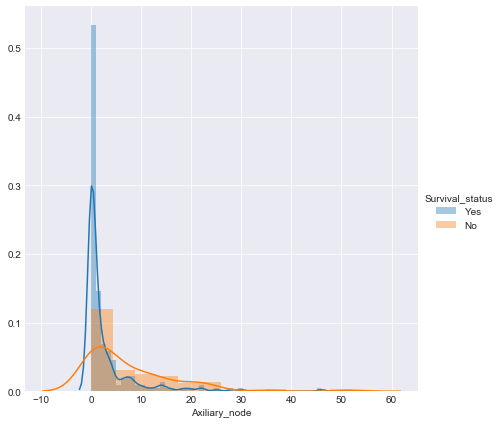

In [60]:
sns.set_style("darkgrid")
sns.FacetGrid(haberman,hue="Survival_status",size=6).map(sns.distplot,"Axiliary_node").add_legend()
plt.plot()

people having Axiliary node between 0 -2 are more likely to survive and people having rest of all axiliary node has less chance to survive 

[0.00927931 0.01670275 0.02845654 0.03278689 0.03402413 0.02536344
 0.02536344 0.01113517 0.00433034 0.00123724]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.18777943 0.08345753 0.07749627 0.0685544  0.08941878 0.08941878
 0.08345753 0.08345753 0.07451565 0.07153502]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.1481715  0.01891551 0.01134931 0.00504414 0.00567465 0.00126103
 0.00063052 0.         0.00063052 0.00063052]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


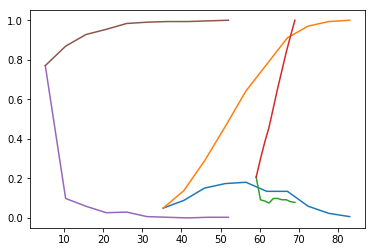

In [17]:
count,bin_edges=np.histogram(haberman["Age"],bins=10,density=True)
print(count)
pdf=count/sum(count)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
count,bin_edges=np.histogram(haberman["Operation_year"],bins=10,density=True)
print(count)
pdf=count/sum(count)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
count,bin_edges=np.histogram(haberman["Axiliary_node"],bins=10,density=True)
print(count)
pdf=count/sum(count)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

between the age of 30-40 90 percent people has survived

In [27]:
print("\n mean without outliers")
print(np.mean(haberman_yes["Age"]))
print(np.mean(haberman_yes["Operation_year"]))
print(np.mean(haberman_yes["Axiliary_node"]))
print("\n mean with outliers")
print(np.mean(np.append(haberman_yes["Age"],60)))
print("\n standard deviation without outliers")
print(np.std(haberman_yes["Age"]))
print(np.std(haberman_yes["Operation_year"]))
print(np.std(haberman_yes["Axiliary_node"]))
print("\n standard deviatio with outliers")
print(np.std(np.append(haberman_yes["Age"],60)))


 mean without outliers
52.11607142857143
62.857142857142854
2.799107142857143

 mean with outliers
52.15111111111111

 standard deviation without outliers
10.913004640364269
3.2220145175061514
5.869092706952767

 standard deviatio with outliers
10.901347974187459


In [28]:
print("\n mean without outliers")
print(np.mean(haberman_no["Age"]))
print(np.mean(haberman_no["Operation_year"]))
print(np.mean(haberman_no["Axiliary_node"]))
print("\n mean with outliers")
print(np.mean(np.append(haberman_no["Age"],60)))
print("\n standard deviation without outliers")
print(np.std(haberman_no["Age"]))
print(np.std(haberman_no["Operation_year"]))
print(np.std(haberman_no["Axiliary_node"]))
print("\n standard deviatio with outliers")
print(np.std(np.append(haberman_no["Age"],60)))


 mean without outliers
53.67901234567901
62.82716049382716
7.45679012345679

 mean with outliers
53.75609756097561

 standard deviation without outliers
10.10418219303131
3.3214236255207883
9.128776076761632

 standard deviatio with outliers
10.066317872125685


In [30]:
print("\n median without outliers")
print(np.median(haberman_yes["Age"]))
print(np.median(haberman_yes["Operation_year"]))
print(np.median(haberman_yes["Axiliary_node"]))
print("\n median without outlier")
print(np.median(np.append(haberman_yes["Age"],60)))
print("\n percentile")
print(np.percentile(haberman_yes["Age"],10))
print("\n quantile")
print(np.percentile(haberman_yes["Age"],np.arange(0,100,25)))



 median without outliers
52.0
63.0
0.0

 median without outlier
52.0

 percentile
38.0

 quantile
[30. 43. 52. 60.]


In [31]:
print("\n median without outliers")
print(np.median(haberman_no["Age"]))
print(np.median(haberman_no["Operation_year"]))
print(np.median(haberman_no["Axiliary_node"]))
print("\n median without outlier")
print(np.median(np.append(haberman_no["Age"],60)))
print("\n percentile")
print(np.percentile(haberman_no["Age"],90))
print("\n quantile")
print(np.percentile(haberman_no["Age"],np.arange(0,100,25)))


 median without outliers
53.0
63.0
4.0

 median without outlier
53.0

 percentile
67.0

 quantile
[34. 46. 53. 61.]


In [32]:
print(robust.mad(haberman_yes["Age"]))
print(robust.mad(haberman_yes["Operation_year"]))
print(robust.mad(haberman_yes["Axiliary_node"]))
print(robust.mad(haberman_no["Age"]))
print(robust.mad(haberman_no["Operation_year"]))
print(robust.mad(haberman_no["Axiliary_node"]))

 


13.343419966550417
4.447806655516806
0.0
11.860817748044816
4.447806655516806
5.930408874022408


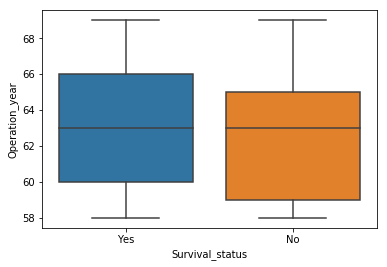

In [50]:
sns.boxplot(x="Survival_status",y="Operation_year",data=haberman)
plt.show()

during 1958 to 1960 there is combination of survial and dead cases occur but according to point 25%  of survival status is under fallasy during year 1958-1960


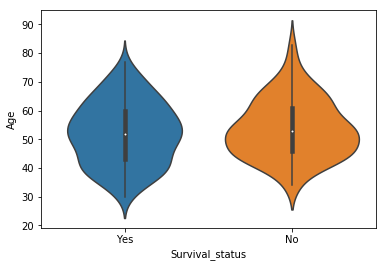

In [51]:
sns.violinplot(x="Survival_status",y="Age",data=haberman,size=6)
plt.show()

point of central tendency for survival is lies at age 58....

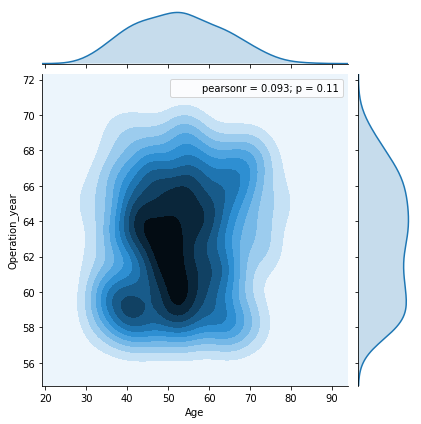

In [48]:
sns.jointplot(x="Age",y="Operation_year",data=haberman,kind="kde")
plt.show()

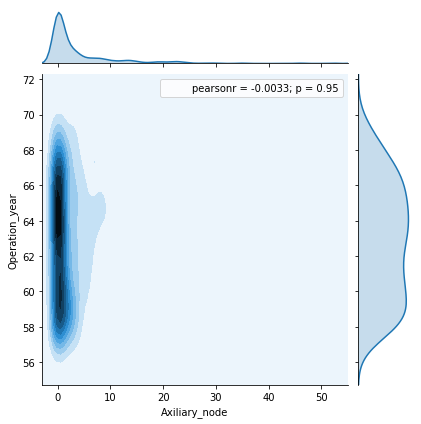

In [52]:
sns.jointplot(x="Axiliary_node",y="Operation_year",data=haberman,kind="kde")
plt.show()